In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
!wget http://home.agh.edu.pl/~czech/datasets/ed-titanic-training.csv 
!wget http://home.agh.edu.pl/~czech/datasets/ed-titanic-test.csv
!wget http://home.agh.edu.pl/~czech/vis-datasets/misc/nyt-frame.csv

**zadanie 1**

In [ ]:
import pandas as pd
train = pd.read_csv('./ed-titanic-training.csv')
test = pd.read_csv('./ed-titanic-test.csv')
train.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,1,0,2,0,3,1,1,2,0,3
2,2,1,3,0,1,0,1,0,0,1,1,4
3,3,1,1,0,2,0,3,0,1,2,0,3
4,4,0,3,1,2,0,1,0,0,1,1,1


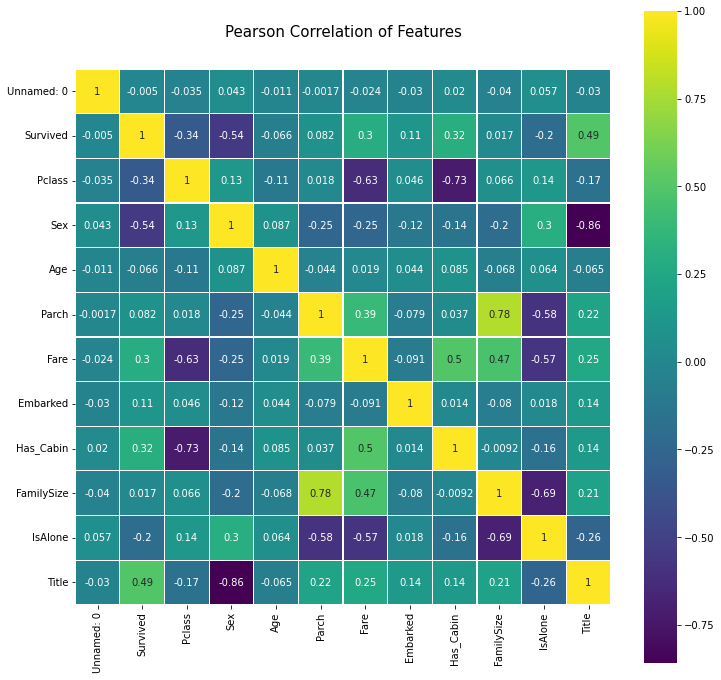

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True)

Najbardziej skorelowane z etykietą przeżycia są cechy: Sex, Title, Pclass, Has_Cabin oraz Fare.

Wszystkie cechy są w równym stopniu skorelowane ze sobą.



In [ ]:
titles = list(np.unique(train['Title']))
print('Survival rate:')
for title in titles:
  example = train['Title'] == title
  w = np.where(example, train['Survived'], np.nan)
  probabilities = w[~np.isnan(w)]
  print(f"  title {title}: {np.mean(probabilities)}")

Survival rate:
  title 1: 0.15667311411992263
  title 2: 0.575
  title 3: 0.7936507936507936
  title 4: 0.7027027027027027
  title 5: 0.34782608695652173


In [ ]:
x_train = train.iloc[:, 2:]
y_train = train.iloc[:, 1]
x_test = test.iloc[:, 1:]

x_train.shape

(891, 10)

In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [i for i in range(1,11)],
          'criterion': ['gini', 'entropy']}

decision_tree = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(decision_tree, param_grid=params, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
results = grid_search.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
  print(mean_test_score, params)

0.7822846441947565 {'criterion': 'gini', 'max_depth': 1}
0.7912983770287141 {'criterion': 'gini', 'max_depth': 2}
0.8305243445692885 {'criterion': 'gini', 'max_depth': 3}
0.8125468164794007 {'criterion': 'gini', 'max_depth': 4}
0.8114481897627964 {'criterion': 'gini', 'max_depth': 5}
0.8081523096129837 {'criterion': 'gini', 'max_depth': 6}
0.8148564294631709 {'criterion': 'gini', 'max_depth': 7}
0.8126466916354558 {'criterion': 'gini', 'max_depth': 8}
0.8249687890137329 {'criterion': 'gini', 'max_depth': 9}
0.8227590511860174 {'criterion': 'gini', 'max_depth': 10}
0.7822846441947565 {'criterion': 'entropy', 'max_depth': 1}
0.7890511860174781 {'criterion': 'entropy', 'max_depth': 2}
0.8316479400749064 {'criterion': 'entropy', 'max_depth': 3}
0.8215355805243446 {'criterion': 'entropy', 'max_depth': 4}
0.8271660424469414 {'criterion': 'entropy', 'max_depth': 5}
0.817103620474407 {'criterion': 'entropy', 'max_depth': 6}
0.8092259675405742 {'criterion': 'entropy', 'max_depth': 7}
0.80925093

In [ ]:
print(f"best params: {grid_search.best_params_}")
print(f"best accuracy: {grid_search.best_score_}")

best params: {'criterion': 'entropy', 'max_depth': 3}
best accuracy: 0.8316479400749064


In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, criterion='entropy')
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from numpy import savetxt
prediction = decision_tree.predict(x_test)
savetxt('prediction.csv', prediction, delimiter=',')

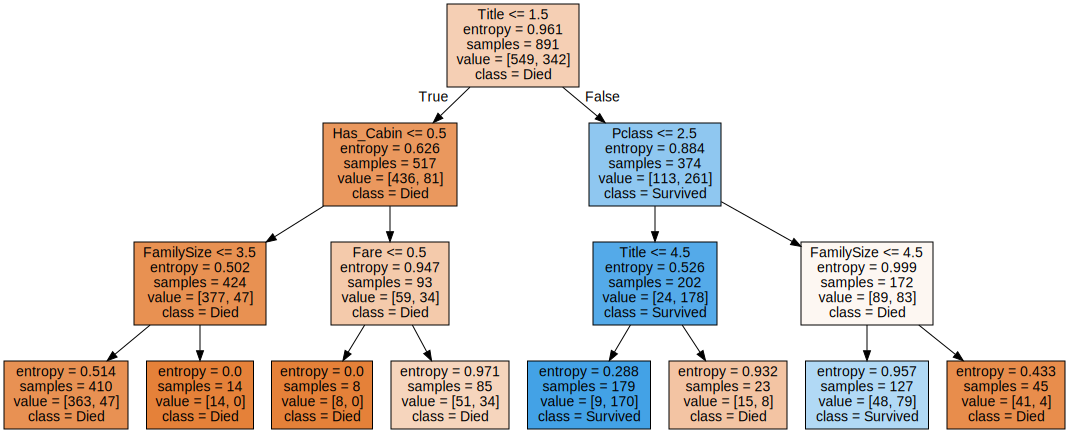

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree, out_file="tree.dot", class_names=["Died", "Survived"], feature_names=x_train.columns, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
params = {'max_depth': [i for i in range(1,15)],
          'criterion': ['gini', 'entropy']}

decision_tree = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(decision_tree, param_grid=params, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14]},
             scoring='accuracy')

In [ ]:
results = grid_search.cv_results_
accuracy_g = []
accuracy_e = []
max_depth_g = []
max_depth_e = []
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
  if params['criterion'] == 'gini':
    accuracy_g.append(mean_test_score)
    max_depth_g.append(params['max_depth'])
  else:
    accuracy_e.append(mean_test_score)
    max_depth_e.append(params['max_depth'])    
  print(mean_test_score, params)

0.7822846441947565 {'criterion': 'gini', 'max_depth': 1}
0.7912983770287141 {'criterion': 'gini', 'max_depth': 2}
0.8305243445692885 {'criterion': 'gini', 'max_depth': 3}
0.8125468164794007 {'criterion': 'gini', 'max_depth': 4}
0.8103245942571785 {'criterion': 'gini', 'max_depth': 5}
0.8081523096129837 {'criterion': 'gini', 'max_depth': 6}
0.818227215980025 {'criterion': 'gini', 'max_depth': 7}
0.8126466916354558 {'criterion': 'gini', 'max_depth': 8}
0.8227215980024969 {'criterion': 'gini', 'max_depth': 9}
0.8238826466916356 {'criterion': 'gini', 'max_depth': 10}
0.8160174781523096 {'criterion': 'gini', 'max_depth': 11}
0.8115355805243446 {'criterion': 'gini', 'max_depth': 12}
0.8149063670411983 {'criterion': 'gini', 'max_depth': 13}
0.8126591760299625 {'criterion': 'gini', 'max_depth': 14}
0.7822846441947565 {'criterion': 'entropy', 'max_depth': 1}
0.7890511860174781 {'criterion': 'entropy', 'max_depth': 2}
0.8316479400749064 {'criterion': 'entropy', 'max_depth': 3}
0.8215355805243446

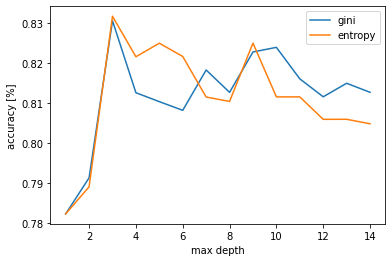

In [ ]:
plt.plot(max_depth_g, accuracy_g, label='gini')
plt.plot(max_depth_e, accuracy_e, label='entropy')
plt.xlabel("max depth")
plt.ylabel("accuracy [%]")
plt.legend()

Zarówno dla kryterium podziału gini, jak i entropy największa dokładność występuje przy maksymalnej głębokości drzewa równej 3.


In [ ]:
params = {'min_samples_leaf': [i for i in range(1,15)],
          'criterion': ['gini', 'entropy']}

decision_tree = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(decision_tree, param_grid=params, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14]},
             scoring='accuracy')

In [ ]:
results = grid_search.cv_results_
accuracy_g = []
accuracy_e = []
min_samples_leaf_g = []
min_samples_leaf_e = []
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
  if params['criterion'] == 'gini':
    accuracy_g.append(mean_test_score)
    min_samples_leaf_g.append(params['min_samples_leaf'])
  else:
    accuracy_e.append(mean_test_score)
    min_samples_leaf_e.append(params['min_samples_leaf'])    
  print(mean_test_score, params)

0.8149063670411983 {'criterion': 'gini', 'min_samples_leaf': 1}
0.8148813982521848 {'criterion': 'gini', 'min_samples_leaf': 2}
0.8159675405742821 {'criterion': 'gini', 'min_samples_leaf': 3}
0.8182272159800249 {'criterion': 'gini', 'min_samples_leaf': 4}
0.8081398252184769 {'criterion': 'gini', 'min_samples_leaf': 5}
0.8103870162297128 {'criterion': 'gini', 'min_samples_leaf': 6}
0.8125967540574282 {'criterion': 'gini', 'min_samples_leaf': 7}
0.8148439450686642 {'criterion': 'gini', 'min_samples_leaf': 8}
0.8103495630461923 {'criterion': 'gini', 'min_samples_leaf': 9}
0.8092259675405742 {'criterion': 'gini', 'min_samples_leaf': 10}
0.8092259675405744 {'criterion': 'gini', 'min_samples_leaf': 11}
0.8070037453183522 {'criterion': 'gini', 'min_samples_leaf': 12}
0.807016229712859 {'criterion': 'gini', 'min_samples_leaf': 13}
0.807016229712859 {'criterion': 'gini', 'min_samples_leaf': 14}
0.8092759051186016 {'criterion': 'entropy', 'min_samples_leaf': 1}
0.8216104868913858 {'criterion': '

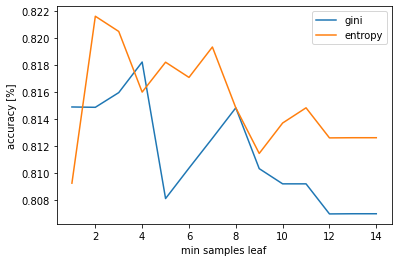

In [ ]:
plt.plot(min_samples_leaf_g, accuracy_g, label='gini')
plt.plot(min_samples_leaf_e, accuracy_e, label='entropy')
plt.xlabel("min samples leaf")
plt.ylabel("accuracy [%]")
plt.legend()

Dla kryterium podziału gini największa dokładność występuje przy najmniejszej liczbie rekordów w liściu równej 4.

Dla kryterium podziału entropy największa dokładność występuje przy najmniejszej liczbie rekordów w liściu równej 2.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [ ]:
decision_tree.fit(X_train, Y_train)
predictions = decision_tree.predict(X_test)

[[113  21]
 [ 18  71]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


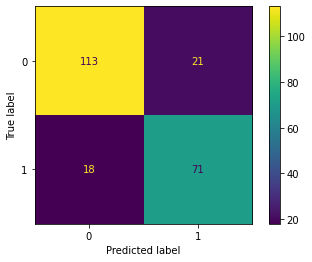

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score, PrecisionRecallDisplay
print(confusion_matrix(Y_test, predictions))
plot_confusion_matrix(decision_tree, X_test, Y_test)  
plt.show()

In [ ]:
print(f"accuracy: {accuracy_score(Y_test, predictions)}")
print(f"f1-score: {f1_score(Y_test, predictions)}")

accuracy: 0.8251121076233184
f1-score: 0.7845303867403315


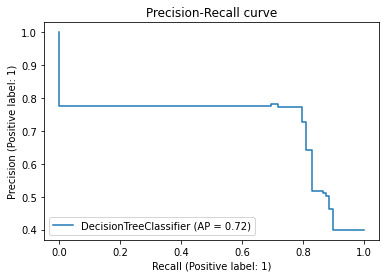

In [ ]:
display = PrecisionRecallDisplay.from_estimator(decision_tree, X_test, Y_test)
_ = display.ax_.set_title("Precision-Recall curve")

#**zadanie 2**

**Iris dataset**

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = data.data
y = data.target

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [1, 3, 5, 7]}
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn, param_grid=params, cv=10, scoring='accuracy')
knn_grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7]}, scoring='accuracy')

In [ ]:
knn_grid_results = knn_grid_search.cv_results_
for mean_test_score, params in zip(knn_grid_results['mean_test_score'], knn_grid_results['params']):
  print(f"accuracy: {mean_test_score} for {params}")

accuracy: 0.96 for {'n_neighbors': 1}
accuracy: 0.9666666666666666 for {'n_neighbors': 3}
accuracy: 0.9666666666666668 for {'n_neighbors': 5}
accuracy: 0.9666666666666668 for {'n_neighbors': 7}


In [ ]:
# p=1 -> Taxi,   p=2 -> Euklidesowa
params = {'weights': ['uniform', 'distance'],
          'p': [1, 2]}  
          
knn_grid_search = GridSearchCV(knn, param_grid=params, cv=10, scoring='accuracy')         
knn_grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
knn_grid_results = knn_grid_search.cv_results_
for mean_test_score, params in zip(knn_grid_results['mean_test_score'], knn_grid_results['params']):
  print(f"accuracy: {mean_test_score} for {params}")

accuracy: 0.9666666666666668 for {'p': 1, 'weights': 'uniform'}
accuracy: 0.9666666666666668 for {'p': 1, 'weights': 'distance'}
accuracy: 0.9666666666666668 for {'p': 2, 'weights': 'uniform'}
accuracy: 0.9666666666666668 for {'p': 2, 'weights': 'distance'}


Przetestowane wagi oraz miary odległości nie powodują zmiany dokładność modelu, gdyż dla wszystkich kombinacji dokładność jest taka sama.

**nyt-frame dataset**

In [ ]:
df = pd.read_csv('./nyt-frame.csv')
df.head()

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,...,0.0,0.0,0.048151,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = df.iloc[:,9:]
y = df['class.labels']

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X.values)

In [ ]:
params = {'n_neighbors': [1, 3, 5, 7]}
knn_grid_search = GridSearchCV(knn, param_grid=params, cv=10, scoring='accuracy')

knn_grid_search.fit(X_pca, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7]}, scoring='accuracy')

In [ ]:
knn_grid_results = knn_grid_search.cv_results_
for mean_test_score, params in zip(knn_grid_results['mean_test_score'], knn_grid_results['params']):
  print(f"accuracy: {mean_test_score} for {params}")

accuracy: 0.8518181818181819 for {'n_neighbors': 1}
accuracy: 0.8699999999999999 for {'n_neighbors': 3}
accuracy: 0.9099999999999999 for {'n_neighbors': 5}
accuracy: 0.8618181818181819 for {'n_neighbors': 7}


In [ ]:
# p=1 -> Taxi,   p=2 -> Euklidesowa
params = {'weights': ['uniform', 'distance'],
          'p': [1, 2]}
          
knn_grid_search = GridSearchCV(knn, param_grid=params, cv=10, scoring='accuracy')         
knn_grid_search.fit(X_pca, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
knn_grid_results = knn_grid_search.cv_results_
for mean_test_score, params in zip(knn_grid_results['mean_test_score'], knn_grid_results['params']):
  print(f"accuracy: {mean_test_score} for {params}")

accuracy: 0.8618181818181819 for {'p': 1, 'weights': 'uniform'}
accuracy: 0.8718181818181818 for {'p': 1, 'weights': 'distance'}
accuracy: 0.9099999999999999 for {'p': 2, 'weights': 'uniform'}
accuracy: 0.9200000000000002 for {'p': 2, 'weights': 'distance'}


Najwyższą dokładność osiąga model z zastosowaną Euklidesową miarą odległości. Natomiast najmniejszą dokładnością cechuje sie klasyfikator z zastosowaną miarą odległości Taxi i wagą uniform.

#**Implementacja KD-tree**

In [ ]:
class KDNode:

  def __init__(self, left=None, right=None, content=None, depth=0):
    self.left = left
    self.right = right
    self.content = content
    self.depth = depth

  def create(data, depth=0):
    if len(data) <= 0: 
      return None
    else:
        x, y = np.shape(data)
        median_i = int(x / 2)
        target_axis = depth % y
        sort_data = data[np.argsort(data[:, target_axis])]
        node = KDNode(content=sort_data[median_i], depth=depth)
        node.left = KDNode.create(sort_data[: median_i], depth=depth+1)
        node.right = KDNode.create(sort_data[median_i+1:], depth=depth+1)
        return node

  def calculate_distance(self, target_point):
    distance = np.power(self.content - np.array(target_point), 2).sum() ** 0.5
    return distance

In [ ]:
class KDTree:

    def __init__(self, data):
        self.root = KDNode.create(data)

    def search(self, sample, n_neighbors):
        stack = []
        nearest_nodes = []
        nearest_distances = []
        target_node = self.root

        while target_node:
            stack.append(target_node)
            distance = target_node.calculate_distance(sample)
            if len(nearest_nodes) < n_neighbors:
                nearest_nodes.append(target_node)
                nearest_distances.append(distance)
            else:
                max_distance = max(nearest_distances)
                if distance < max_distance:
                    del_index = nearest_distances.index(max_distance)
                    del(nearest_distances[del_index])
                    del(nearest_nodes[del_index])
                    nearest_nodes.append(target_node)
                    nearest_distances.append(distance)
            axis = target_node.depth % len(sample)
            if sample[axis] < target_node.content[axis]:
                target_node = target_node.left
            else:
                target_node = target_node.right

        while stack:
            current_node = stack.pop()
            current_distance = current_node.calculate_distance(sample)
            max_distance = max(nearest_distances)
            axis = current_node.depth % len(sample)
            if len(nearest_nodes) < n_neighbors or abs(sample[axis] - current_node.content[axis]) < max_distance:
                if sample[axis] < current_node.content[axis]:
                    target_node = current_node.right
                else:
                    target_node = current_node.left
                if target_node:
                    stack.append(target_node)
                    distance = target_node.calculate_distance(sample)
                    if len(nearest_nodes) < n_neighbors:
                        nearest_nodes.append(target_node)
                        nearest_distances.append(distance)
                    else:
                        if distance < max_distance:
                            del_index = nearest_distances.index(max_distance)
                            del (nearest_nodes[del_index])
                            del (nearest_distances[del_index])
                            nearest_nodes.append(target_node)
                            nearest_distances.append(distance)

        nearest_points = [nearest_node.content.tolist() for nearest_node in nearest_nodes]

        return nearest_points, nearest_distances

**testowanie KD-tree**

In [ ]:
data = np.random.randint(12, size=(7, 2))
kd_tree = KDTree(data)

test_sample = [5, 7]
sample = [float(i) for i in test_sample]
n_neighbors = 5

n_points, n_distances = kd_tree.search(sample, n_neighbors)
print(f"Data: {data}")
print(f"Nearest points: {n_points}")
print(f"Nearest distances: {n_distances}")

Data: [[ 2  4]
 [ 0  0]
 [ 2  4]
 [ 4 10]
 [ 4  2]
 [10  1]
 [ 1  4]]
Nearest points: [[2, 4], [4, 2], [4, 10], [10, 1], [1, 4]]
Nearest distances: [4.242640687119285, 5.0990195135927845, 3.1622776601683795, 7.810249675906654, 5.0]
